In [1]:
#importing necessary libaries that would be needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the Breast Cancer csv file and naming it df
df = pd.read_csv("Breast_Cancer.csv")

In [3]:
#Reading the first 5 rows of the file
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
#Checking for the number of rows and number of columns
df.shape

(4024, 16)

In [5]:
# Checking for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

## DATA CLEANING

In [6]:
# Reginol Node Positive columnn should be Regional Node Positive (spelling issue). 
df.rename(columns = {'Reginol Node Positive': 'Regional Node Positive'}, inplace = True)

In [7]:
# Checking for null values
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           0
Status                    0
dtype: int64

Since there are no null values in all the columns. we can move on

In [8]:
# Checking for duplicate rows
df[df.duplicated()]

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
436,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive


Index 436 is duplicated, so i intend to drop it

In [9]:
#Dropping duplicate
df = df.drop_duplicates()

In [10]:
#Changing some column data types to category

df['Marital Status'] = df['Marital Status'].astype('category')
df['Race'] = df['Race'].astype('category')
df['Status'] = df['Status'].astype('category')
df['Estrogen Status'] = df['Estrogen Status'].astype('category')
df['Progesterone Status'] = df['Progesterone Status'].astype('category')

In [11]:
# Checking the hightest age
df['Age'].max()

69

In [12]:
# Checking the lowest age
df['Age'].min()

30

In [13]:
# Using a def function to create a new column called age range
def age(number):
    if number < 40:
        return 'Thirties'
    if number >= 40 and number < 50:
        return 'Forties'
    if number >= 50 and number < 60:
        return 'Fifties'
    if number >= 60:
        return 'Sixties'

In [14]:
df['Age Category']=df['Age'].apply(age) #applying the def function to the new column created

In [15]:
# Creating a new column showing the number of survival years by dividing the survival month column by 12 (12 months makes a year)
df['Year'] = df['Survival Months']//12

In [16]:
df1 = df[df['Status'] == 'Alive']

In [17]:
df2 = df[df['Status'] == 'Dead']

In [18]:
A = df1['A Stage'].value_counts(normalize=True)*100
percent = A.round(1).astype(str).add('%')
percent

Regional    98.3%
Distant      1.7%
Name: A Stage, dtype: object

In [19]:
A = df2['A Stage'].value_counts(normalize=True)*100
percent = A.round(1).astype(str).add('%')
percent

Regional    94.3%
Distant      5.7%
Name: A Stage, dtype: object

In [20]:
N = df1['Differentiate'].value_counts(normalize=True)*100
percent = N.round(1).astype(str).add('%')
percent

Moderately differentiated    60.0%
Poorly differentiated        24.9%
Well differentiated          14.8%
Undifferentiated              0.3%
Name: Differentiate, dtype: object

C:\Users\Temitope\AppData\Local\Temp\ipykernel_9988\1880621581.py:135: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(" NCI Breast cancer analysis.png", edgecolor = 'deeppink', papertype='letter')


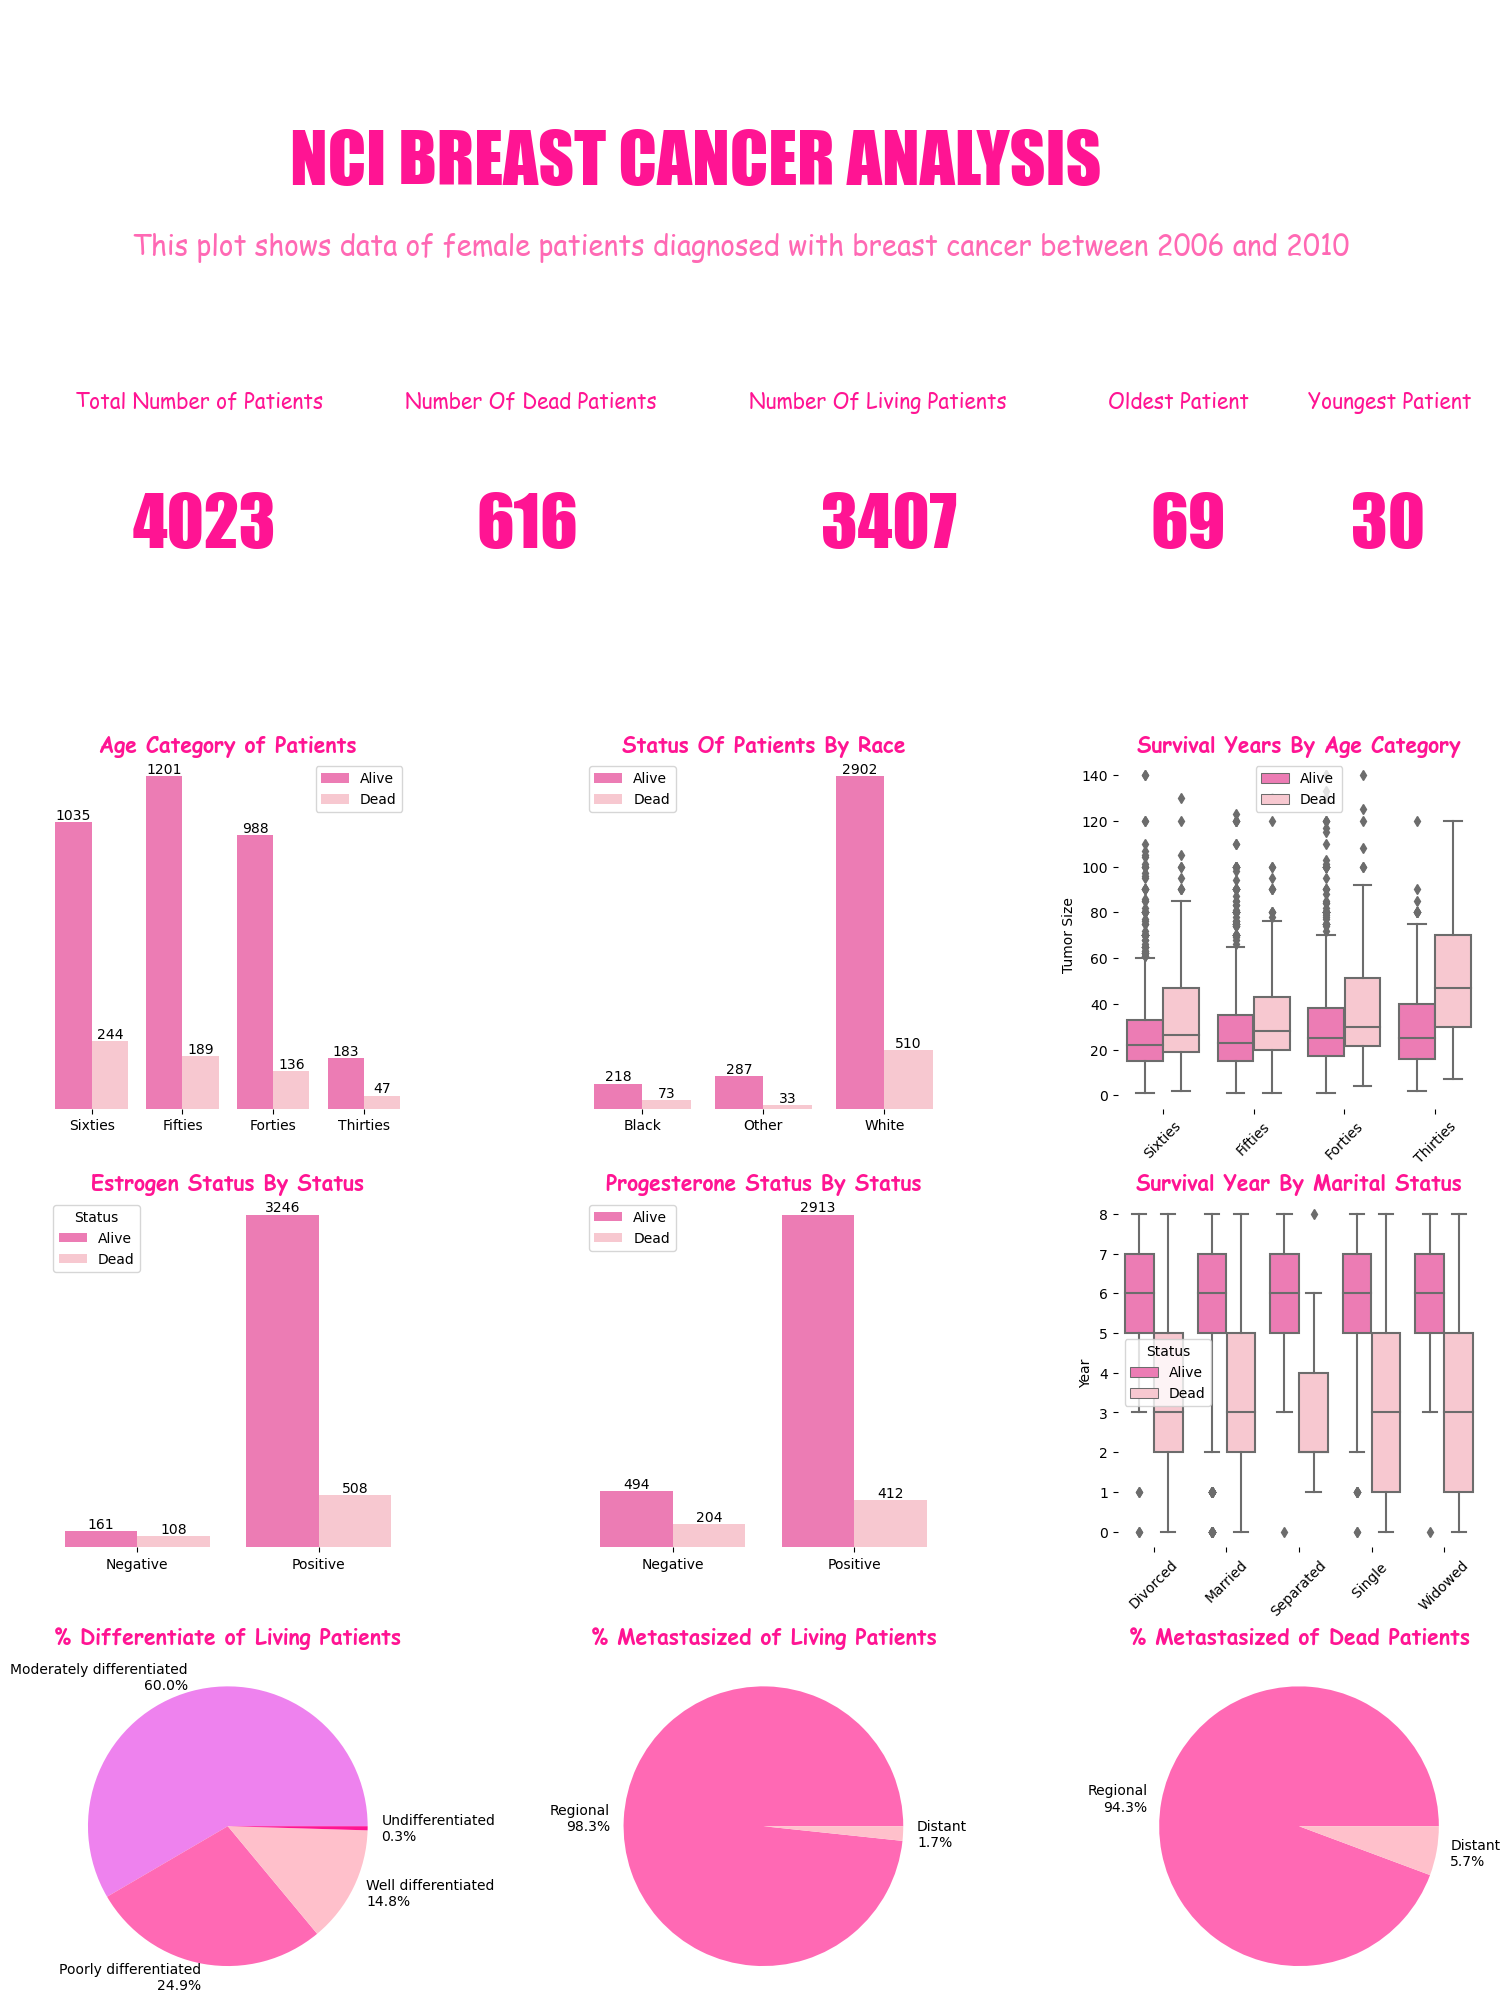

In [24]:
fig = plt.figure(figsize=(15,20), constrained_layout=True,facecolor='white',edgecolor='green') 
spec = fig.add_gridspec(5,3)# 5 rows & 3 columns the shape and size of the dashboard figure

#Creating a rectangle and putting the dashboard title and subtitle in it
plot1 = fig.add_subplot(spec[0,:])
plot1 = plt.Rectangle((0,0), height = 4, width = 7, facecolor = 'white', ec = "white")
plot1 = plt.rcParams['axes.edgecolor'] = 'none'
plt.text(0.17,0.5,'NCI BREAST CANCER ANALYSIS', color = 'deeppink', font ='fantasy', size = 50)
plt.text(0.06,0.3,'This plot shows data of female patients diagnosed with breast cancer between 2006 and 2010', color = 'hotpink', size=20, font ='cursive' )
plt.xticks([], [])
plt.yticks([], [])

#Creating a rectangle and puting the KPI's in it
plot2 = fig.add_subplot(spec[1,:])
plot2 = plt.Rectangle((0,0), height = 2, width = 5, facecolor = 'white', ec = "white")
plot2 = plt.rcParams['axes.edgecolor'] = 'none'
plt.text(0.02,0.9, f'Total Number of Patients', font='cursive', size = 15, color = 'deeppink')
plt.text(0.06,0.5,f'{len(df)}', font='fantasy',size=50,color='deeppink')
plt.text(0.25,0.9, f'Number Of Dead Patients', font='cursive', size = 15, color = 'deeppink')
plt.text(0.30,0.5,f'{len(df2)}', font='fantasy',size=50,color='deeppink')
plt.text(0.49,0.9, f'Number Of Living Patients', font='cursive', size = 15, color = 'deeppink')
plt.text(0.54,0.5,f'{len(df1)}', font='fantasy',size=50,color='deeppink')
plt.text(0.88,0.9, f'Youngest Patient', font='cursive', size = 15, color = 'deeppink')
plt.text(0.91,0.5,f'{round(df.Age.min())}', font='fantasy',size=50, color ='deeppink')
plt.text(0.74,0.9, f'Oldest Patient', font='cursive', size = 15, color = 'deeppink')
plt.text(0.77,0.5,f'{round(df.Age.max())}', font='fantasy',size=50, color ='deeppink')
plt.xticks([], [])
plt.yticks([], [])

# Plot a count plot showing the age category of the patients
plot3 = fig.add_subplot(spec[2,0])
palette ={"Alive": "hotpink", "Dead": "pink"}
plot3 = sns.countplot(x = 'Age Category', hue = 'Status', data=df, palette=palette )
plot3.set_title('Age Category of Patients', fontsize= 15, color='deeppink', font='cursive', weight='heavy')
plot3.legend(loc='upper right')
for i in plot3.containers:
    plot3.bar_label(i, label_type='edge')
plot3.set_xlabel('')
plot3.set_yticks([], [])
plot3.set_ylabel('')
plot3.tick_params(axis='x', rotation=0)
plot3 = plt.rcParams['axes.edgecolor'] = 'none'

# Plotting a countplot showing the race of patients
plot4 = fig.add_subplot(spec[2,1])
palette ={"Alive": "hotpink", "Dead": "pink"}
plot4 = sns.countplot(x = 'Race', data = df, palette=palette, hue='Status')
plot4.set_title('Status Of Patients By Race', fontsize= 15, color='deeppink', font='cursive', weight='heavy')
plot4.legend(loc='upper left')
for i in plot4.containers:
    plot4.bar_label(i, label_type='edge')
plot4.set_yticks([], [])
plot4.set_xlabel('')
plot4.set_ylabel('')
plot4 = plt.rcParams['axes.edgecolor'] = 'none'

# Plotting a boxplot showing the tumor size of patients that are dead and alive by their age categories
palette ={"Alive": "hotpink", "Dead": "pink"}
plot5 = fig.add_subplot(spec[2,2])
plot5 = sns.boxplot(data=df, x='Age Category', y='Tumor Size', hue='Status', palette=palette)
plot5.set_title('Survival Years By Age Category', fontsize= 15, color='deeppink', font='cursive', weight='heavy')
plot5.legend(loc='upper center')
plot5.set_xlabel('')
plot5 = plt.xticks(rotation = 45)

# Plotting a boxplot showing the marital status of patients that are dead and alive by survival years
palette ={"Alive": "hotpink", "Dead": "pink"}
plot6 = fig.add_subplot(spec[3,2])
plot6 = sns.boxplot(data=df, x='Marital Status', y='Year', hue='Status', palette=palette)
plot6.set_title('Survival Year By Marital Status', fontsize= 15, color='deeppink', font='cursive', weight='heavy')
plot6.set_xlabel('')
plot6 = plt.xticks(rotation = 45)

# Plotting a countplot showing the estrogen status of patients
plot7= fig.add_subplot(spec[3,0])
palette ={"Alive": "hotpink", "Dead": "pink"}
plot7 = sns.countplot(x = 'Estrogen Status', hue = 'Status', data=df, palette=palette)
plot7.set_title('Estrogen Status By Status', fontsize= 15, color='deeppink', weight='heavy', font='cursive')
#plot8.legend(loc='upper right')
for i in plot7.containers:
    plot7.bar_label(i, label_type='edge')
plot7.set_xlabel('')
plot7.set_yticks([], [])
plot7.set_ylabel('')
plot7.tick_params(axis='x', rotation=0)
plot7 = plt.rcParams['axes.edgecolor'] = 'none'

# Plotting a countplot showing the progesterone status of patients
plot8= fig.add_subplot(spec[3,1])
palette ={"Alive": "hotpink", "Dead": "pink"}
plot8 = sns.countplot(x = 'Progesterone Status', hue = 'Status', data=df, palette=palette)
plot8.set_title('Progesterone Status By Status', fontsize= 15, color='deeppink', weight='heavy', font='cursive')
plot8.legend(loc='upper left')
for i in plot8.containers:
    plot8.bar_label(i, label_type='edge')
plot8.set_xlabel('')
plot8.set_yticks([], [])
plot8.set_ylabel('')
plot8.tick_params(axis='x', rotation=0)
plot8 = plt.rcParams['axes.edgecolor'] = 'none'

#Plotting a pie chart showing the how the cells are responding to treatment in living patients only
plot9= fig.add_subplot(spec[4,0])
Differentiate = df['Differentiate'].value_counts(normalize=True)*100
percent = Differentiate.round(1).astype(str).add('%')
#Plot a pie Chart
label = ['Moderately differentiated\n60.0%', 'Poorly differentiated\n24.9%', 'Well differentiated\n14.8%', 'Undifferentiated\n0.3%']
color = ['violet', 'hotpink', 'pink', 'deeppink']
plot9 = Differentiate.plot(kind='pie', labels=label, colors=color)
plot9.set_title('% Differentiate of Living Patients', fontsize = 15, color='deeppink', weight='heavy', font='cursive')
plot9.set_ylabel('')


#This shows the level to which the cancer has metastasized or spread to other parts of the body in living patients
plot10= fig.add_subplot(spec[4,1])
Spreading = df1['A Stage'].value_counts(normalize=True)*100
percent = Spreading.round(1).astype(str).add('%')
label = ['Regional\n98.3%', 'Distant\n1.7%']
color = ['hotpink', 'pink']
plot10 = Spreading.plot(kind='pie', labels=label, colors=color)
plot10.set_title('% Metastasized of Living Patients', fontsize = 15, color='deeppink', weight='heavy', font='cursive')
plot10.set_ylabel('')


#This shows the level to which the cancer has metastasized or spread to other parts of the body in dead patient
plot11= fig.add_subplot(spec[4,2])
Spreading = df2['A Stage'].value_counts(normalize=True)*100
percent = Spreading.round(1).astype(str).add('%')
label = ['Regional\n94.3%', 'Distant\n5.7%']
color = ['hotpink', 'pink']
plot11 = Spreading.plot(kind='pie', labels=label, colors=color)
plot11.set_title('% Metastasized of Dead Patients', fontsize = 15, color='deeppink', weight='heavy', font='cursive')
plot11.set_ylabel('')

plt.savefig(" NCI Breast cancer analysis.png", edgecolor = 'deeppink', papertype='letter')